# 1 - Perkenalan

Nama: Tandya Anggergian

Batch: FTDS-10

Dataset: Telco Customer Churn

In this dataset, we tried to predict behavior to retain customer.

In this dataset there are valuable information, such as:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# 2 - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# 3 - Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Duplicate Dataset

data_copy = data.copy()

In [ ]:
#Check Daistribution

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4 - Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

---
## Dataset Dimension

In [ ]:
data.shape

(7043, 21)

There are 21 columns and 7043 rows on this dataset.

---
## Dataset Preview

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---
## Check Data Type on Each Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check how many numerical columns on this dataset.

In [ ]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical columns. \n'.format(len(numerical)))

print('The numerical columns are:', numerical)

There are 3 numerical columns. 

The numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical columns. \n'.format(len(categorical)))

print('The categorical columns are:', categorical)

There are 18 categorical columns. 

The categorical columns are: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


---
## Check Missing Value Percentage

In [ ]:
data.isnull().sum() / data.shape[0] * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There are no missing value on this dataset.

---
## Check Numerical Data Distribution

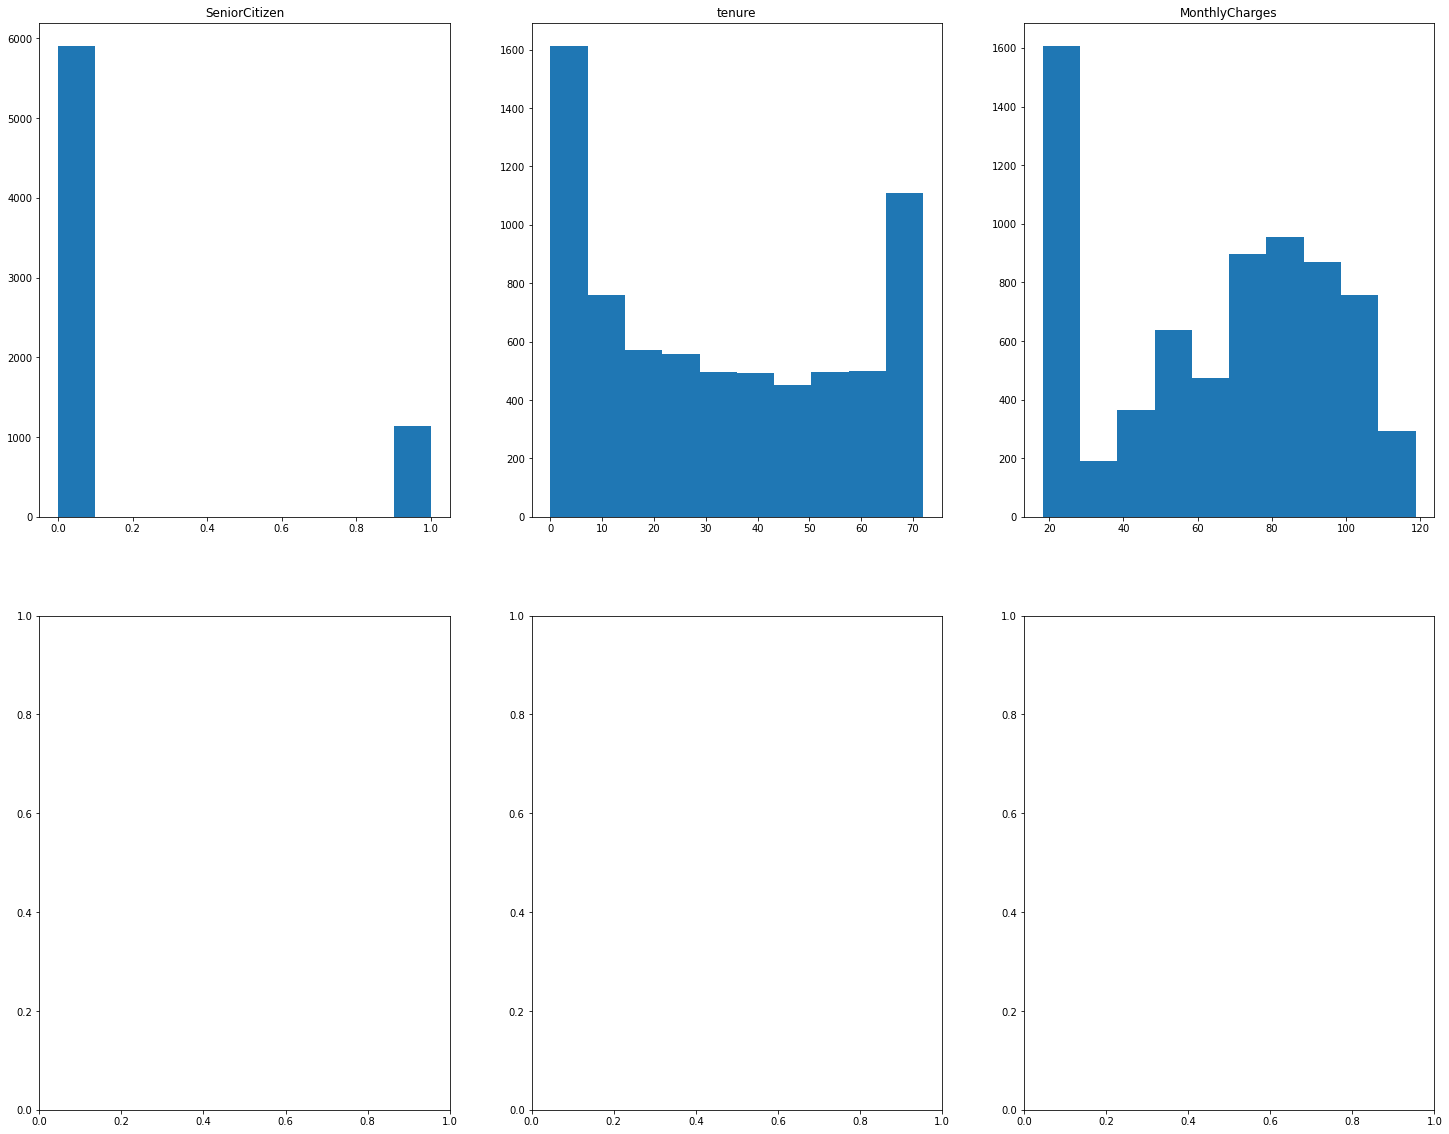

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(25, 20))

counter = 0
for num_column in numerical:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

There is indication of outliers in each numerical columns.

There is no age indication in 'SeniorCitizens'. According to the notes, 1 means customer is a senior citizen and 0 means customer is not a senior citizens.

Tenure indicates how many months the customer has stayed with the company.


MonthlyCharges indicates the amount charged to the customer monthly.

The graph shows that the columns has different distribution. To make it clearer, we can see the skewness by using this equation.


In [ ]:
for column in numerical:
    print(f'\'{data[column].name}\' skewness: {data[column].skew()}')
    if data[column].skew() > 0.5:
        print('right skewed')
    elif data[column].skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

'SeniorCitizen' skewness: 1.8336327440928564
right skewed
'tenure' skewness: 0.2395397495619829
normal distribution
'MonthlyCharges' skewness: -0.22052443394398033
normal distribution


From the equation we can see that both 'tenure' and 'MonthlyCharges' have normal distribution and 'SeniorCitizens' is right skewed.

---
## Check Categorical Data Distribution

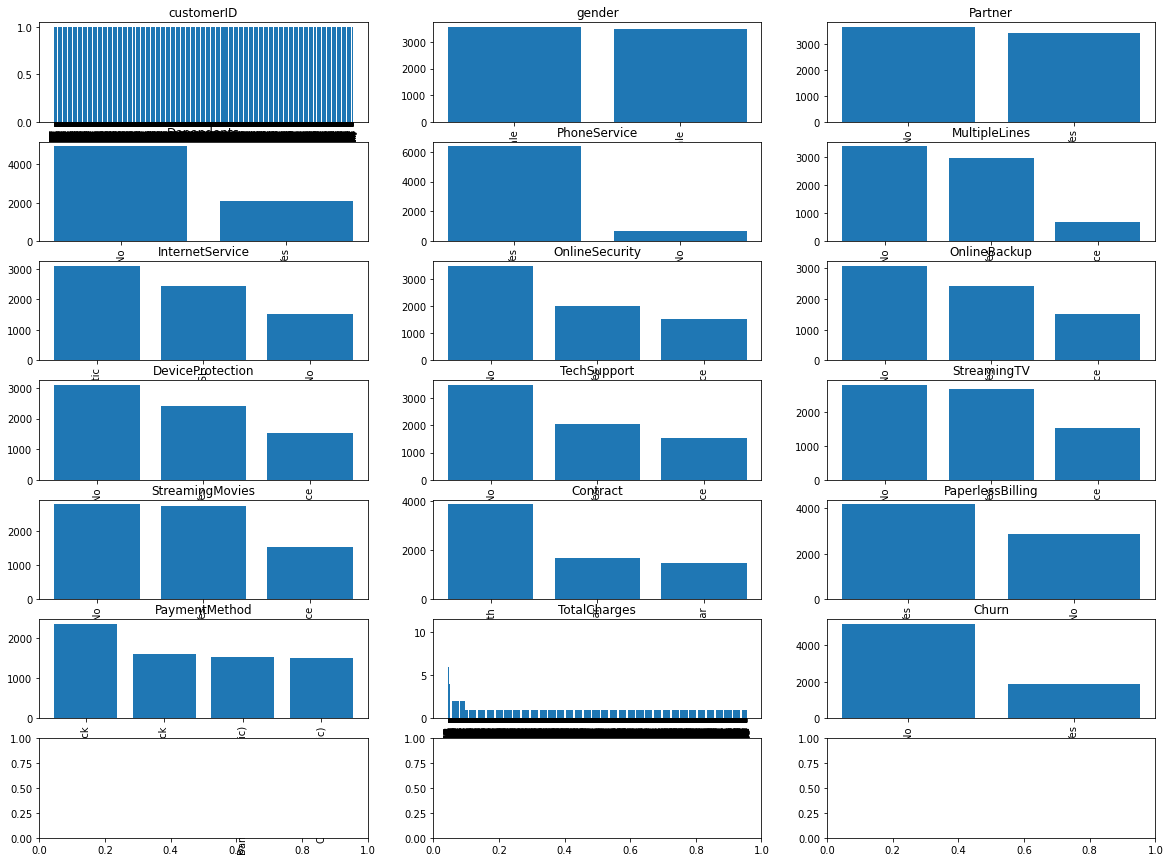

In [ ]:
fig, axs = plt.subplots(7, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

'CustomerID' is used as an identification for the customer, so this column can be dropped later.

'MultipleLines' indicates Whether the customer has multiple lines or not (Yes, No, No phone service).

'InternetService' indicates Customer’s internet service provider (DSL, Fiber optic, No).

'OnlineSecurity' indicates Whether the customer has online security or not (Yes, No, No Internet service).

'OnlineBackup' indicates Whether the customer has online backup or not (Yes, No, No internet service).

'DeviceProtection' indicates Whether the customer has device protection or not (Yes, No, No internet service).

'TechSupport' indicates Whether the customer has tech support or not (Yes, No, No internet service).

'StreamingTV' indicates Whether the customer has streaming TV or not (Yes, No, No internet service).

'StreamingMovies' indicates Whether the customer has streaming movies or not (Yes, No, No internet service).

'Contract' indicates The contract term of the customer (Month-to-month, One year, Two year).

'PaperlessBilling' indicates Whether the customer has paperless billing or not (Yes, No).

'paymentMethod' indicates The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

'Churn' is the target for this dataset, consist of 'Yes' and 'No'.

There is anomaly on 'totalCharges' since this column is about the total amount charged to the customer but has data type 'object'. Maybe this column data type can be changed later to float.

There are other thing that can be changed later, such as anything with 'No internet service' can be categorized as 'No'. The reason is both has similar meaning, which is the customer don't have those services on their household.

---
### Anomaly on 'TotalCharges'

In [ ]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Apparently, there are missing values on 'TotalCharges' and it's not listed as NaN. Later we can change the missing value to NaN.

---
## Check Dataset's Statistical Property

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


There are no anomalies seen on the statistical property.

---
## Analyzing Target Column

In this dataset, the target column is 'Churn' with the information about whether the customer churned or not.

Use barplot to calculate how many customer that churned or not.

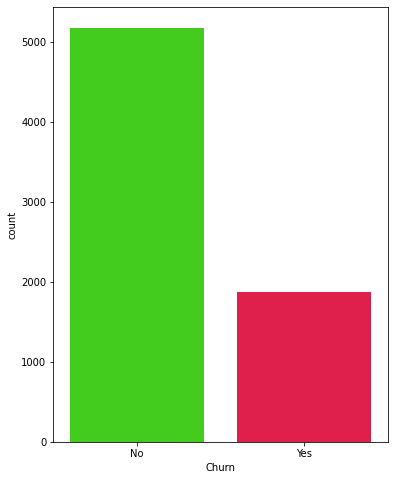

In [ ]:
f, ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='Churn', data=data, palette='prism')
plt.show()

From the barplot shown above, we can see that the number of churned customer is smaller than not churned customer.

In a glance, target column can be assumed as imbalance. We can calculate the degree of imbalance to make sure how imbalance the target column is.

In [ ]:
data['Churn'].value_counts() / len(data)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

According to Google Developers, there are 3 degree of imbalance, which is Mild, Moderate, and Extreme.

- Mildly Imbalanced: 20-40% of the data set
- Moderately Imbalanced: 1-20% of the data set
- Extremely Imbalanced: less than 1% of the data set

Since the proportion of minority class in this case is 26.537% of the dataset, we can categorize that this data is mildly imbalance.

Source: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

---
## Churn Proportion on Each Gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


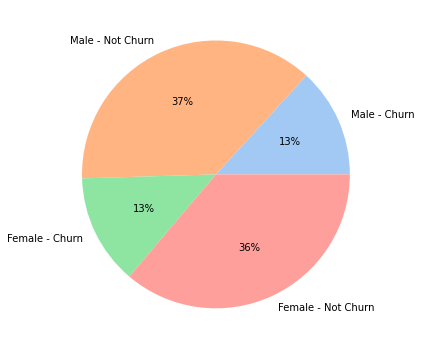

In [ ]:
male = data[data["gender"]=='Male']
female = data[data["gender"]=='Female']

male_yes = male[data["Churn"]=='Yes']
male_not = male[data["Churn"]=='No']
female_yes = female[data["Churn"]=='Yes']
female_not = female[data["Churn"]=='No']

data_diabet = [len(male_yes), len(male_not), len(female_yes), len(female_not)]
labels = ['Male - Churn', 'Male - Not Churn', 'Female - Churn', 'Female - Not Churn']

palette_color = sns.color_palette('pastel')
f, ax = plt.subplots(figsize=(6, 8))
ax = plt.pie(data_diabet, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

From the plot above we can see that:
- Male - Churn = 13%
- Male - Not Churn = 37%
- Female - Churn = 13%
- Female - Not Churn = 36%

## Analyzing 'SeniorCitizen' to 'Churn'

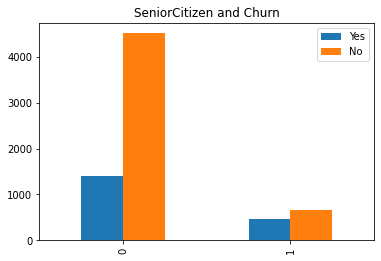

In [ ]:
sc_target_data = pd.DataFrame()
sc_target_data['Yes'] = data[data['Churn']=='Yes']['SeniorCitizen'].value_counts()
sc_target_data['No'] = data[data['Churn']=='No']['SeniorCitizen'].value_counts()

sc_target_data.plot.bar(title = 'SeniorCitizen and Churn')

Plot above show that both senior citizen and not senior citizen who is not churned are higher than the churned one.

---
## Analyzing 'Partner' to 'Churn'

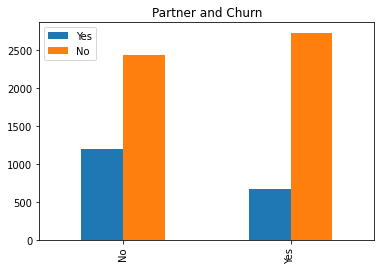

In [ ]:
pt_target_data = pd.DataFrame()
pt_target_data['Yes'] = data[data['Churn']=='Yes']['Partner'].value_counts()
pt_target_data['No'] = data[data['Churn']=='No']['Partner'].value_counts()

pt_target_data.plot.bar(title = 'Partner and Churn')

Plot above show that both customer who have partner or not have tendencies to not churned.

But, customer who doesn't have partner are more likely to churn than customer who has partner.

---
## Analyzing 'Dependents' to 'Churn'

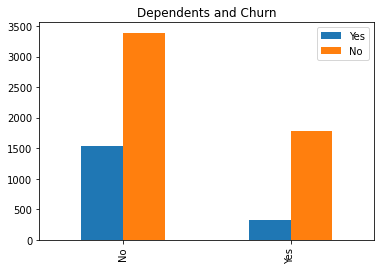

In [ ]:
dp_target_data = pd.DataFrame()
dp_target_data['Yes'] = data[data['Churn']=='Yes']['Dependents'].value_counts()
dp_target_data['No'] = data[data['Churn']=='No']['Dependents'].value_counts()

dp_target_data.plot.bar(title = 'Dependents and Churn')

Plot above show that both customer who have dependents or not have tendencies to not churned.

But, customer who doesn't have dependents are more likely to churn than customer who has dependents.

---
## Analyzing 'PhoneService' to 'Churn'

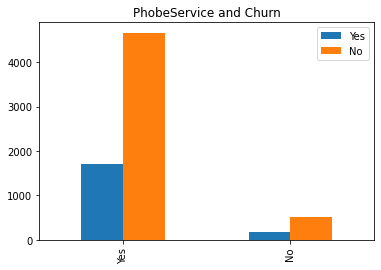

In [ ]:
ps_target_data = pd.DataFrame()
ps_target_data['Yes'] = data[data['Churn']=='Yes']['PhoneService'].value_counts()
ps_target_data['No'] = data[data['Churn']=='No']['PhoneService'].value_counts()

ps_target_data.plot.bar(title = 'PhobeService and Churn')

Plot above show that both customer who have Phone Service or not have tendencies to not churned.

But, customer who has phone service are more likely to churn than customer who doesn't have phone service.

---
## Analyzing 'InternetService' to 'Churn'

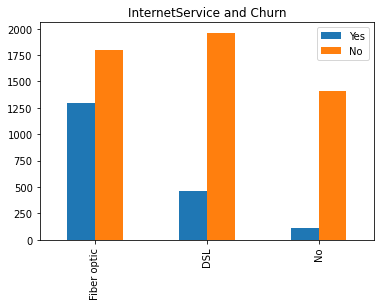

In [ ]:
is_target_data = pd.DataFrame()
is_target_data['Yes'] = data[data['Churn']=='Yes']['InternetService'].value_counts()
is_target_data['No'] = data[data['Churn']=='No']['InternetService'].value_counts()

is_target_data.plot.bar(title = 'InternetService and Churn')

Plot above show that customer who use Fiber optic are more likely to churn than customer who use DSL or doesn't have internet service.

On the other hand, customer who use DSL are more likely to not churn than the other.

---
## Analyzing 'PaymentMethod' to 'Churn'

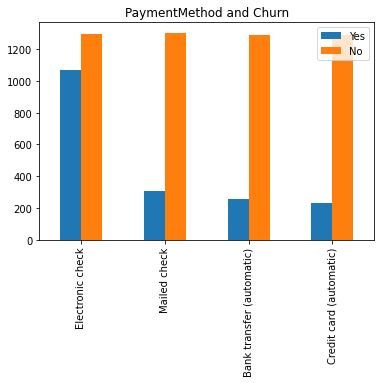

In [ ]:
pm_target_data = pd.DataFrame()
pm_target_data['Yes'] = data[data['Churn']=='Yes']['PaymentMethod'].value_counts()
pm_target_data['No'] = data[data['Churn']=='No']['PaymentMethod'].value_counts()

pm_target_data.plot.bar(title = 'PaymentMethod and Churn')

Plot above show that customer who use Electronic check are more likely to churn than customer who use other payment method.

Other interesting this in the amount of customer who did not churn are similar on each payment method.

---
## Conclusion

- There are no missing value on the dataset.
- There is anomaly on 'totalCharges' since this column is about the total amount charged to the customer but has data type 'object'.
- There are other thing that can be changed later, such as anything with 'No internet service' can be categorized as 'No'.
- The target column is mildly imbalance.
- Customer who doesn't has partner are more likely to churn.
- Customer who doesn't have dependents are more likely to churn.
- Customer who has phone service are more likely to churn.
- Customer who use Fiber optic are more likely to churn than customer who use other internet service.
- Customer who use Electronic check are more likely to churn than customer who use other payment method

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

---
## Data Cleaning

In data cleaning, the things we will do are:

- Drop unnecessary column.
- Change target columns from 'yes' or 'no' to 1/0.
- Replacing the missing value into NaN.
- Change 'TotalCharges' data type from object to numeric.
- Change some values in columns into 'No'.

First, we make the copy to do data cleaning.

In [ ]:
data_clean = data.copy()
data_clean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Next, we drop unnecessary column, which is 'customerID'.

We can drop 'CustomerID' since it's only a customer identifier and 'PaymentMethod' is not giving much info personally.

In [ ]:
data_clean = data_clean.drop(['customerID', 'PaymentMethod'], axis=1)

In [ ]:
data_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.6,Yes


Next we change 'yes' and 'no' value on target column as 1 and 0.

In [ ]:
yn_column = ['Churn']

def boolean_clean(row, column_name):
    if row[column_name] == 'Yes':
        return 1
    else:
        return 0

for bool_col in yn_column:
    data_clean[bool_col + '_bool'] = data.apply(lambda row: boolean_clean(row, bool_col),axis=1)

data_clean = data_clean.drop(columns = yn_column)
data_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.6,1


Next we change the missing value into from 'TotalCharges' into NaN.

In [ ]:
data_clean['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
data_clean['TotalCharges'].replace(' ', np.NaN)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
data_clean['TotalCharges'].isnull().sum()

0

Next, we convert 'TotalCharges' data type from object to numeric.

In [ ]:
data_clean['TotalCharges'] = pd.to_numeric(data_clean['TotalCharges'], errors='coerce')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


There are some values that can be changed in order to make the computation easier. Let's see which columns that has those value.

In [ ]:
data_clean['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

From this column we can change 'No phone service' to 'No' since it has similar meaning.

In [ ]:
data_clean['MultipleLines'] = data_clean['MultipleLines'].replace(['No phone service'],'No')
data_clean['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

Another columns that we can change the value is 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies'.

In [ ]:
data_clean['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
data_clean['OnlineSecurity'] = data_clean['OnlineSecurity'].replace(['No internet service'],'No')
data_clean['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [ ]:
data_clean['OnlineBackup'] = data_clean['OnlineBackup'].replace(['No internet service'],'No')
data_clean['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [ ]:
data_clean['DeviceProtection'] = data_clean['DeviceProtection'].replace(['No internet service'],'No')
data_clean['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [ ]:
data_clean['TechSupport'] = data_clean['TechSupport'].replace(['No internet service'],'No')
data_clean['TechSupport'].value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [ ]:
data_clean['StreamingTV'] = data_clean['StreamingTV'].replace(['No internet service'],'No')
data_clean['StreamingTV'].value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [ ]:
data_clean['StreamingMovies'] = data_clean['StreamingMovies'].replace(['No internet service'],'No')
data_clean['StreamingMovies'].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

---
## Data Inference

In [ ]:
data_inf = data_clean.sample(10, random_state=17)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool
3616,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,87.30,6055.55,0
2055,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,108.45,4964.70,0
5394,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,105.10,5083.55,0
3697,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,89.60,2901.80,0
2516,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,96.40,1581.20,1
6368,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,94.00,181.70,1
4183,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,33.60,33.60,0
3543,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,105.60,7581.50,0
6674,Male,0,No,No,7,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,23.50,173.00,0
1893,Male,0,No,Yes,16,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,69.10,1083.70,0


Drop the data inference.

In [ ]:
data_train_test = data_clean.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.60,1


Do reset index.

In [ ]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool
0,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,87.30,6055.55,0
1,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,108.45,4964.70,0
2,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,105.10,5083.55,0
3,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,89.60,2901.80,0
4,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,96.40,1581.20,1
5,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,94.00,181.70,1
6,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,33.60,33.60,0
7,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,105.60,7581.50,0
8,Male,0,No,No,7,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,23.50,173.00,0
9,Male,0,No,Yes,16,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,69.10,1083.70,0


---
## Splitting Dataset

In [ ]:
X = data_train_test.drop('Churn_bool', axis=1)
y = data_train_test['Churn_bool']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,84.80,1990.50
7029,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,103.20,7362.90
7030,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,29.60,346.45
7031,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,74.40,306.60


Next we split to get the value of X_train, X_test, y_train, y_test, X_val, and y_val.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 7, stratify=y_train)

print('Train Size: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('Test Size: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('Validation Size: ', X_val.shape)
print('y_val shape: ', y_val.shape)

Train Size:  (5063, 18)
y_train shape:  (5063,)
Test Size:  (1407, 18)
y_test shape:  (1407,)
Validation Size:  (563, 18)
y_val shape:  (563,)


In [ ]:
y_train.value_counts()

0    3719
1    1344
Name: Churn_bool, dtype: int64

---
## Handling Outlier

Looking for outlier in numerical data on X_train.

In [ ]:
numerical_xtrain = [var for var in X_train.columns if X_train[var].dtype!='O']

print('There are {} numerical columns. \n'.format(len(numerical_xtrain)))

print('The numerical columns are:', numerical_xtrain)

There are 4 numerical columns. 

The numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
X_train[numerical_xtrain].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
45,0,49,84.50,3906.70
6637,0,51,19.40,997.75
4895,0,24,56.35,1381.20
1480,0,39,35.55,1309.15
3000,0,27,79.50,2180.55


We can check if the column have outlier or not by using boxplot.

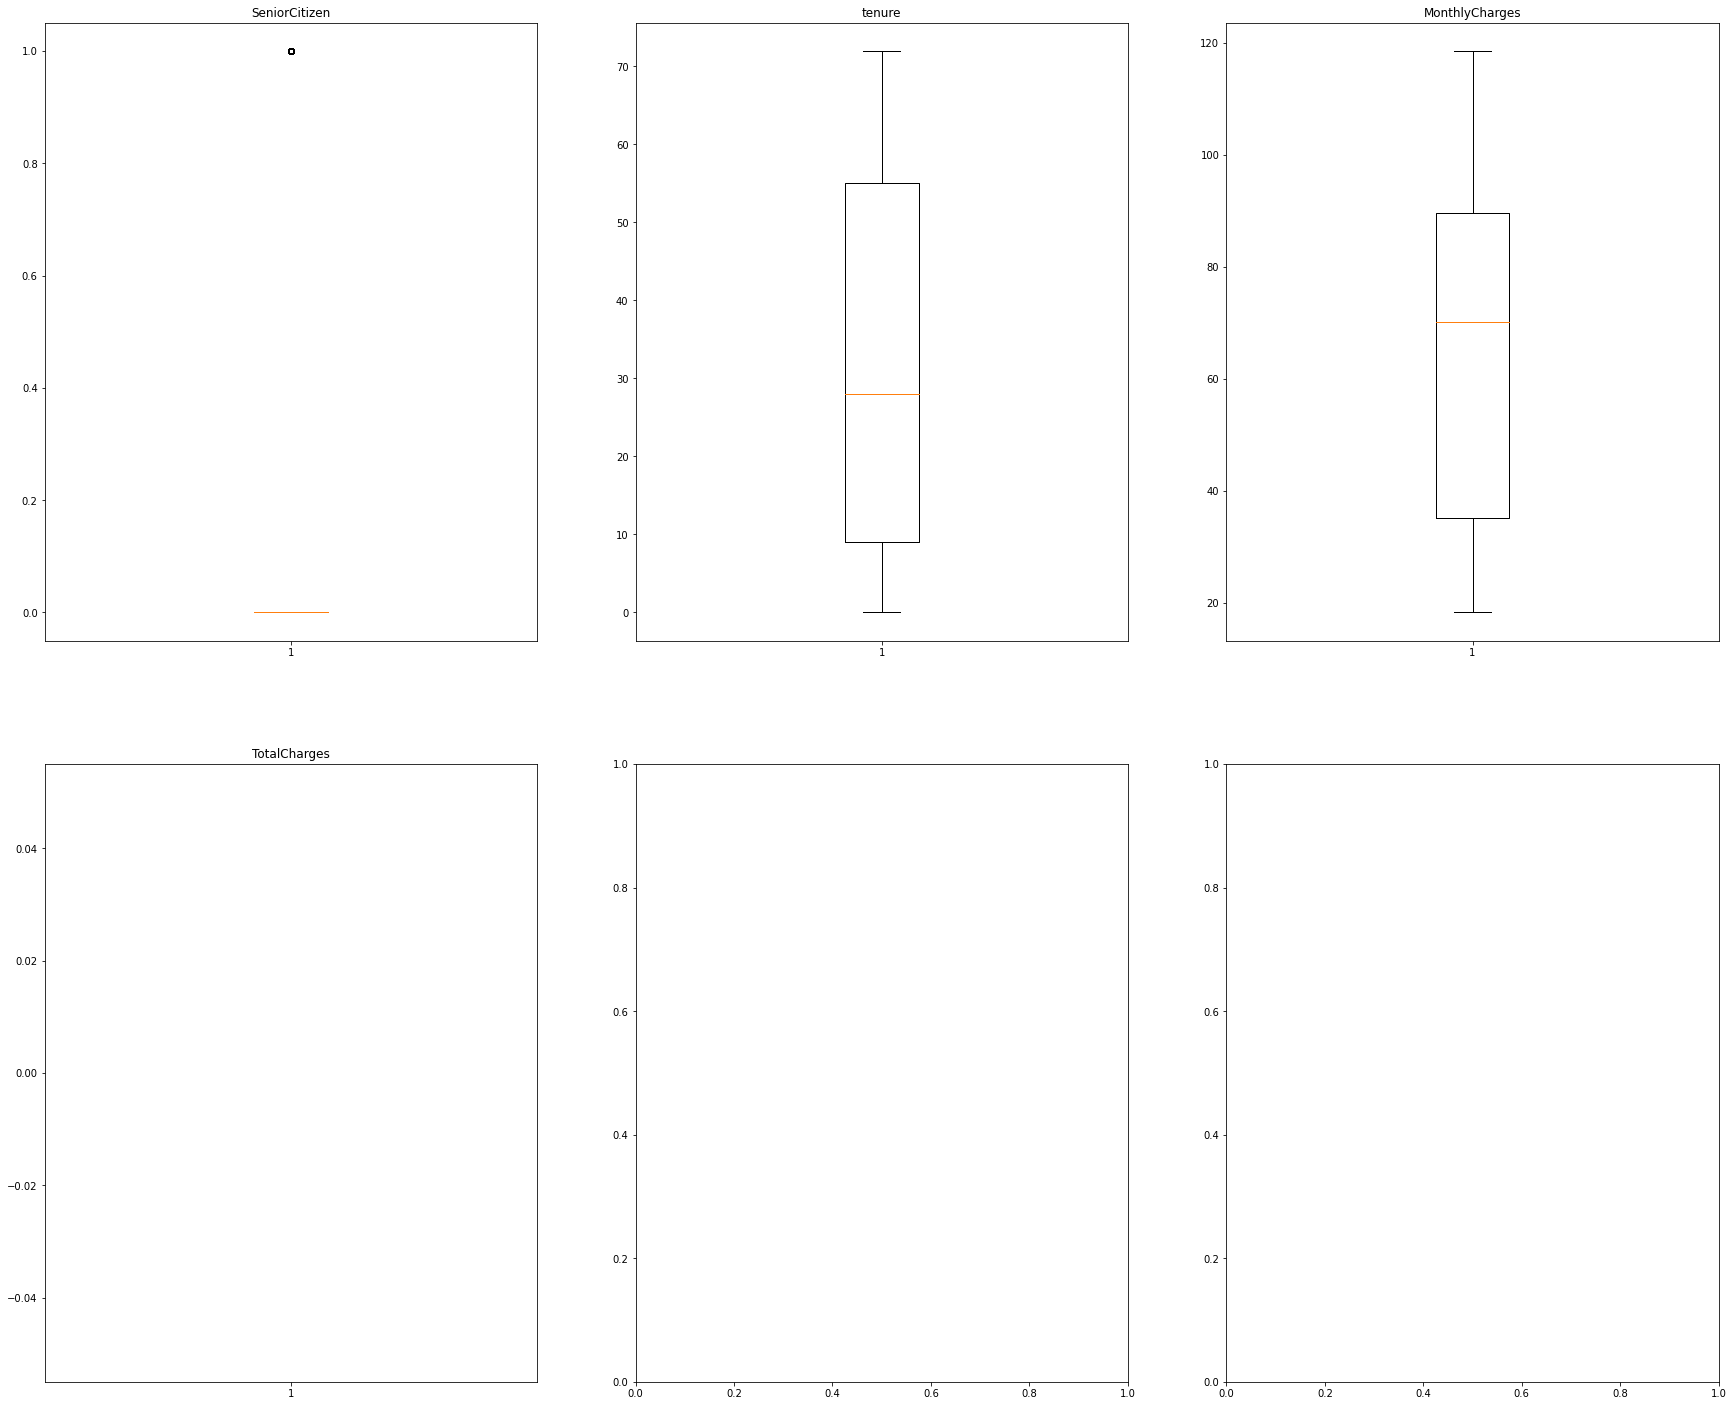

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(30, 25))

counter = 0
for num_column in numerical_xtrain:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].boxplot(X_train[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

From a glance we can see that there are no outlier on the numerical columns. Next we check outlier percentage.

In [ ]:
def check_outlier(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= 0.5:
        upper_boundary = data[column].mean() + 3*data[column].std()
        lower_boundary = data[column].mean() - 3*data[column].std()
        print('[Normal]')
        print(f'Upper boundary {column} = {upper_boundary}')
        print(f'Lower boundary {column} = {upper_boundary}')
        print('Total data above upper boundary : {}'.format(len(data[data[column] > upper_boundary])))
        print('Total data below lower boundary : {}'.format(len(data[data[column] < lower_boundary])))
        print('Percentage above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('Percentage below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-' * 100)

    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
        lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
        print('[Skewed]')
        print(f'Upper boundary {column} = {upper_boundary}')
        print(f'Lower boundary {column} = {upper_boundary}')
        print('Total data above upper boundary : {}'.format(len(data[data[column] > upper_boundary])))
        print('Total data below lower boundary : {}'.format(len(data[data[column] < lower_boundary])))
        print('Percentage above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('Percentage below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-' * 100)

In [ ]:
feature_check = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
for feature in feature_check:
    check_outlier(X_train, feature)

[Skewed]
Upper boundary SeniorCitizen = 0.0
Lower boundary SeniorCitizen = 0.0
Total data above upper boundary : 818
Total data below lower boundary : 0
Percentage above upper boundary : 16.156428994667195
Percentage below lower boundary : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Upper boundary tenure = 124.0
Lower boundary tenure = 124.0
Total data above upper boundary : 0
Total data below lower boundary : 0
Percentage above upper boundary : 0.0
Percentage below lower boundary : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Upper boundary MonthlyCharges = 171.55
Lower boundary MonthlyCharges = 171.55
Total data above upper boundary : 0
Total data below lower boundary : 0
Percentage above upper boundary : 0.0
Percentage below lower boundary : 0.0
----------------------------------------------------------------------------------------------------
[

Apparently there are no outlier in numerical column except 'SeniorCitizen'. Since the number is higher than 15%, we will ignore the outlier.

Next, we check if there's a missing value on X_train.

---
## Handling Missing Value

Looking for missing value on X_train, X_test, and X-val.

---
### Data Numerical

In [ ]:
X_train[numerical_xtrain].isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      8
dtype: int64

There are missing values on 'TotalCharges', next we can determine what should we do with the missing values.

In [ ]:
for column in numerical_xtrain:
    if X_train[column].isnull().mean()>0:
        print(column, round(X_train[column].isnull().mean(),3))

TotalCharges 0.002


The amount of missing values is pretty low, so we can assume that this is an MCAR. Next we see the the skewness for each column.

In [ ]:
for column in numerical_xtrain:
    print(f'\'{X_train[column].name}\' skewness: {X_train[column].skew()}')
    if X_train[column].skew() > 0.5:
        print('right skewed')
    elif X_train[column].skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

'SeniorCitizen' skewness: 1.8396165249072203
right skewed
'tenure' skewness: 0.25222315647691446
normal distribution
'MonthlyCharges' skewness: -0.2077369926006177
normal distribution
'TotalCharges' skewness: 0.9876673411196936
right skewed


Because this is an MCAR case, we can fill the missing value with median, since we did not do anything with the outlier.

In [ ]:
for data_med in [X_train, X_test, X_val]:
    for column in numerical_xtrain:
        median_value = X_train[column].median()
        data_med[column].fillna(median_value, inplace=True)

Next, we check the missing value on X_tran, X_test, and X_val.

In [ ]:
X_train[numerical_xtrain].isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [ ]:
X_test[numerical_xtrain].isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [ ]:
X_val[numerical_xtrain].isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

---
### Data Categorical

In [ ]:
categorical_xtrain = [var for var in X_train.columns if X_train[var].dtype=='O']

print('Categorical columns are:', categorical_xtrain)

Categorical columns are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']


Check the missing value for categorical data in X_train, X_test, and X_val.

In [ ]:
X_train[categorical_xtrain].isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
dtype: int64

In [ ]:
X_test[categorical_xtrain].isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
dtype: int64

In [ ]:
X_val[categorical_xtrain].isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
dtype: int64

There are no missing values on the categorical columns. Next we select which feature that will be used on the model.

---
## Feature Selection

In [ ]:
X_train_feat = X_train.copy()

There are some columns that have ordinal data, we will change the value into numeric.

In [ ]:
gender_dict = {'Male' : 0, 'Female' : 1}

X_train_feat['gender'] = X_train_feat.gender.map(gender_dict)

yn_dict = {'No' : 0, 'Yes' : 1}

X_train_feat['Partner'] = X_train_feat.Partner.map(yn_dict)
X_train_feat['Dependents'] = X_train_feat.Dependents.map(yn_dict)
X_train_feat['PhoneService'] = X_train_feat.PhoneService.map(yn_dict)
X_train_feat['MultipleLines'] = X_train_feat.MultipleLines.map(yn_dict)
X_train_feat['OnlineSecurity'] = X_train_feat.OnlineSecurity.map(yn_dict)
X_train_feat['OnlineBackup'] = X_train_feat.OnlineBackup.map(yn_dict)
X_train_feat['DeviceProtection'] = X_train_feat.DeviceProtection.map(yn_dict)
X_train_feat['TechSupport'] = X_train_feat.TechSupport.map(yn_dict)
X_train_feat['StreamingTV'] = X_train_feat.StreamingTV.map(yn_dict)
X_train_feat['StreamingMovies'] = X_train_feat.StreamingMovies.map(yn_dict)
X_train_feat['PaperlessBilling'] = X_train_feat.PaperlessBilling.map(yn_dict)

internetservice_dict = {'No': 0, 'Fiber optic': 1, 'DSL': 2}

X_train_feat['InternetService'] = X_train_feat.InternetService.map(internetservice_dict)

cont_dict = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

X_train_feat['Contract'] = X_train_feat.Contract.map(cont_dict)

X_train_feat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
45,1,0,0,0,49,1,1,1,0,0,0,0,0,1,0,1,84.50,3906.70
6637,0,0,1,1,51,1,0,0,0,0,0,0,0,0,1,0,19.40,997.75
4895,1,0,0,0,24,1,0,2,1,0,0,1,0,0,0,0,56.35,1381.20
1480,0,0,0,0,39,0,0,2,0,0,1,1,0,0,1,0,35.55,1309.15
3000,0,0,0,1,27,1,1,1,0,0,0,1,0,0,0,1,79.50,2180.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,0,0,0,0,13,1,0,1,1,0,0,0,0,0,0,1,73.75,956.65
1750,1,0,0,0,50,1,0,1,0,0,1,1,0,1,2,1,89.70,4304.50
6765,0,1,0,0,57,1,1,2,0,1,1,0,1,1,2,1,79.75,4438.20
3305,1,0,1,0,15,1,1,0,0,0,0,0,0,0,2,0,25.20,387.90


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_feat)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_feat), index=X_train_feat.index, columns=X_train_feat.columns)
X_train_num_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
45,1.0,0.0,0.0,0.0,0.680556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.660189,0.448635
6637,0.0,0.0,1.0,1.0,0.708333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.011460,0.112959
4895,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.379671,0.157207
1480,0.0,0.0,0.0,0.0,0.541667,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.172397,0.148893
3000,0.0,0.0,0.0,1.0,0.375000,1.0,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.610364,0.249448


We are going to look for 10 best feature for the model using SelectKBest.

In [ ]:
X_select = X_train_num_scaled
y_select = y_train
selector = SelectKBest(chi2, k=10)
selector.fit(X_select, y_select)
X_train_new = selector.transform(X_select)
print(X_select.columns[selector.get_support(indices=True)])

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [ ]:
print

<function print>

So, features that is going to be used on this case based on SelectKBest are ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'].

Next, we set the feature for X_train, X_test, and X_val.

In [ ]:
X_train = X_train[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]
X_test = X_test[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]
X_val = X_val[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]

---
## Splitting Numerical and Categorical Columns

In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['MonthlyCharges', 'TotalCharges']
Categorical Columns:  ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']


In [ ]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

---
### Feature Scaling

To determine the scaling method, we check the skewness level.

In [ ]:
X_train[num_columns].skew()

MonthlyCharges   -0.207737
TotalCharges      0.989848
dtype: float64

Because there is column that skewed, we will use MinMaxScaler.

In [ ]:
scaler =  MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

X_train_num_scaled

array([[0.66018934, 0.44863518],
       [0.01145989, 0.11295934],
       [0.37967115, 0.15720723],
       ...,
       [0.61285501, 0.50996717],
       [0.0692576 , 0.04258621],
       [0.64823119, 0.2108309 ]])

Next we do feature encoding.

---
### Feature Encoding

We will use OrdinalEncoder for feature encoding.

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = encoder.transform(X_val_cat)

X_train_cat_enc

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 2., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

---
### Concat Numerical and Categorical Columns

In [ ]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_enc], axis=1)

X_train_final

array([[0.66018934, 0.44863518, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.01145989, 0.11295934, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.37967115, 0.15720723, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61285501, 0.50996717, 0.        , ..., 1.        , 2.        ,
        1.        ],
       [0.0692576 , 0.04258621, 0.        , ..., 0.        , 2.        ,
        0.        ],
       [0.64823119, 0.2108309 , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,MonthlyCharges,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,0.660189,0.448635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.011460,0.112959,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.379671,0.157207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.172397,0.148893,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.610364,0.249448,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5058,0.553064,0.108217,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5059,0.712008,0.494539,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
5060,0.612855,0.509967,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
5061,0.069258,0.042586,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
X_train_final.shape

(5063, 10)

In [ ]:
X_test_final.shape

(1407, 10)

In [ ]:
X_val_final.shape

(563, 10)

# 6 - Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Making Pipeline

---
### Pipeline for Train Dataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
train_dataset = train_dataset.batch(100)

---
### Pipeline for Validation Dataset

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(100)

---
### Pipeline for Test Dataset

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(100)


---
## Making Model

---
### Sequential API

In [ ]:
model_sq =  Sequential()
model_sq.add(Dense(5, activation='relu', input_shape=(10,)))
model_sq.add(Dropout(0.5))
model_sq.add(Dense(1, activation='sigmoid'))

model_sq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Model Sequential API Summary
print(model_sq.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


---
### Functional API

In [ ]:
data_input = Input(shape=(10,))
hidden = Dense(5, activation='relu')(data_input)
drop = Dropout(0.50)(hidden)
output = Dense(1, activation='sigmoid')(hidden)

model_fc = Model(inputs=data_input, outputs=output)

model_fc.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Model Functional API Summary
print(model_fc.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


# 7 - Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

---
## Sequential API

In [ ]:
history_sq = model_sq.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
51/51 [==============================] - 5s 5ms/step - loss: 0.8606 - accuracy: 0.4237 - val_loss: 0.7904 - val_accuracy: 0.3144
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.4649 - val_loss: 0.7318 - val_accuracy: 0.3197
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.5023 - val_loss: 0.6995 - val_accuracy: 0.4618
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5663 - val_loss: 0.6772 - val_accuracy: 0.6874
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6530 - val_loss: 0.6609 - val_accuracy: 0.7194
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.7146 - val_loss: 0.6486 - val_accuracy: 0.7176
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.7243 - val_loss: 0.6386 - val_accuracy: 0.7211
Epoch 8/100
5

---
## Functional API

In [ ]:
history_fc = model_fc.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
51/51 [==============================] - 1s 5ms/step - loss: 1.1465 - accuracy: 0.2971 - val_loss: 1.0098 - val_accuracy: 0.3091
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.9127 - accuracy: 0.3202 - val_loss: 0.8157 - val_accuracy: 0.3748
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7408 - accuracy: 0.4462 - val_loss: 0.6719 - val_accuracy: 0.5915
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.6715 - val_loss: 0.5951 - val_accuracy: 0.7353
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7345 - val_loss: 0.5618 - val_accuracy: 0.7353
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7345 - val_loss: 0.5402 - val_accuracy: 0.7353
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7345 - val_loss: 0.5236 - val_accuracy: 0.7353
Epoch 8/100
5

# 8 - Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

---
## Sequential API

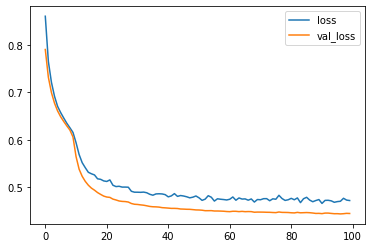

In [ ]:
metrics_sq = pd.DataFrame(history_sq.history)
metrics_sq[['loss', 'val_loss']].plot();

From here we can see that the model has a tendency to be underfitting since the loss and val loss in not connected whatsoever. Unfortunately, the model is kind of unstable since it jagged so much.

Next we check the accuracy.

In [ ]:
y_pred_sq = model_sq.predict(X_test_final)
y_pred_sq = np.where(y_pred_sq >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_test, y_pred_sq))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1033
           1       0.68      0.33      0.44       374

    accuracy                           0.78      1407
   macro avg       0.74      0.64      0.65      1407
weighted avg       0.76      0.78      0.75      1407



The model has accuracy of 78%. It's kind of low for me, so we check the next API which is Functional API.

---
## Functional API

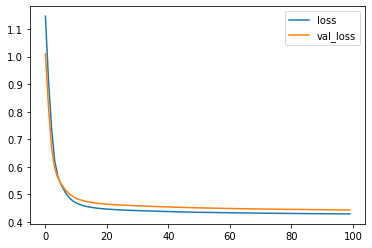

In [ ]:
metrics_fc = pd.DataFrame(history_fc.history)
metrics_fc[['loss', 'val_loss']].plot();

Here we can see that the model is better because the distance between loss and val_loss is not high. Although it's seperated at some point and have a tendency to be overfitting, in my opinion this model is better than the sequential one.

In [ ]:
y_pred_fc = model_fc.predict(X_test_final)
y_pred_fc = np.where(y_pred_fc >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_test, y_pred_fc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The accuracy for this model is 79%, 1% higher than before. Although it's not that different, the recall average is better than the sequential one. So, I will save the functional API model.

---
## Model Improvement

Let's create new model based on Functional API model with different optimizer. On this instance I will try using 'Adamax' and 'Nadam'. I use those two optimizer because both are in the Adaptive Moment Estimation family.

---
### Optimizer Adamax

In [ ]:
data_input = Input(shape=(10,))
hidden = Dense(5, activation='relu')(data_input)
drop = Dropout(0.50)(hidden)
output = Dense(1, activation='sigmoid')(hidden)

model_fc_admx = Model(inputs=data_input, outputs=output)

model_fc_admx.compile(loss='binary_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [ ]:
history_fc_admx = model_fc_admx.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
51/51 [==============================] - 1s 5ms/step - loss: 0.5847 - accuracy: 0.7345 - val_loss: 0.5698 - val_accuracy: 0.7353
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7345 - val_loss: 0.5510 - val_accuracy: 0.7353
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7345 - val_loss: 0.5369 - val_accuracy: 0.7353
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7345 - val_loss: 0.5259 - val_accuracy: 0.7353
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7345 - val_loss: 0.5165 - val_accuracy: 0.7353
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7345 - val_loss: 0.5081 - val_accuracy: 0.7353
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7345 - val_loss: 0.5006 - val_accuracy: 0.7353
Epoch 8/100
5

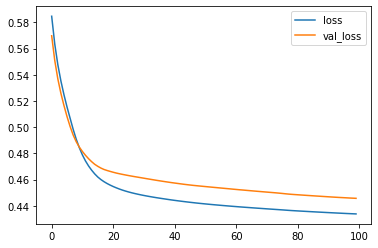

In [ ]:
metrics_fc_admx = pd.DataFrame(history_fc_admx.history)
metrics_fc_admx[['loss', 'val_loss']].plot();

In a glance, this model with Adamax optimizer has similar result with the previous model, although this model also has the tendency to overfit. Next, we check the accuracy score for this model.

In [ ]:
y_pred_fc_admx = model_fc_admx.predict(X_test_final)
y_pred_fc_admx = np.where(y_pred_fc_admx >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_fc_admx))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



This model has similar accuracy with model that use Adam optimizer. If we see the recall score, score to predict value 1 is lower and score to predict value 0 is higher. In my opinion, I prefer using model with both recall score are above 50%.

Next, we make another model using optimizer Nadam.

---
### Optimizer Nadam

In [ ]:
data_input = Input(shape=(10,))
hidden = Dense(5, activation='relu')(data_input)
drop = Dropout(0.50)(hidden)
output = Dense(1, activation='sigmoid')(hidden)

model_fc_ndm = Model(inputs=data_input, outputs=output)

model_fc_ndm.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [ ]:
history_fc_ndm = model_fc_ndm.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
51/51 [==============================] - 2s 16ms/step - loss: 0.6083 - accuracy: 0.6996 - val_loss: 0.5704 - val_accuracy: 0.7371
Epoch 2/100
51/51 [==============================] - 0s 6ms/step - loss: 0.5430 - accuracy: 0.7375 - val_loss: 0.5354 - val_accuracy: 0.7460
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7403 - val_loss: 0.5201 - val_accuracy: 0.7407
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7415 - val_loss: 0.5094 - val_accuracy: 0.7513
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.7500 - val_loss: 0.5004 - val_accuracy: 0.7638
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.4838 - accuracy: 0.7669 - val_loss: 0.4926 - val_accuracy: 0.7726
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7701 - val_loss: 0.4861 - val_accuracy: 0.7798
Epoch 8/100


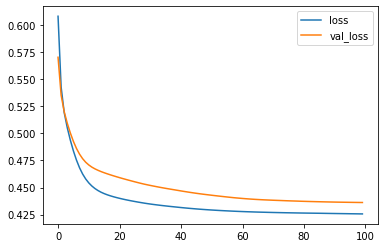

In [ ]:
metrics_fc_ndm = pd.DataFrame(history_fc_ndm.history)
metrics_fc_ndm[['loss', 'val_loss']].plot();

From the graph above, we can see that loss and val_loss score are slightly worse than the model with Adam and Adamax optimizer. Next, let's see the accuracy and recall score.

In [ ]:
y_pred_fc_ndm = model_fc_ndm.predict(X_test_final)
y_pred_fc_ndm = np.where(y_pred_fc_ndm >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_fc_admx))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



The score itself it's not that different from model with Adamax optimizer. Since both model (Adamax and Nadam) are having recall score below 50%, I will use the model with Adam optimizer.

---
## Saving Model

In [ ]:
model_fc.save('modelfc.h5')
print('saved')

saved


Saving pipeline for preprocessor.

In [ ]:
import pickle
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_columns),
                                               ('cat', OrdinalEncoder(), cat_columns)])


In [ ]:
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

# 9 - Model Inference

In [ ]:
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool
0,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,87.30,6055.55,0
1,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,108.45,4964.70,0
2,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,105.10,5083.55,0
3,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,89.60,2901.80,0
4,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,96.40,1581.20,1
5,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,94.00,181.70,1
6,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,33.60,33.60,0
7,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,105.60,7581.50,0
8,Male,0,No,No,7,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,23.50,173.00,0
9,Male,0,No,Yes,16,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,69.10,1083.70,0


In [ ]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [ ]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_columns])
data_inf_final_df

,MonthlyCharges,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,0.688092,0.696600,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.898854,0.570722,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.865471,0.584437,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0.711011,0.332676,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.778774,0.180286,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5,0.754858,0.018792,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6,0.152965,0.001702,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.870453,0.872686,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0
8,0.052317,0.017788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.506726,0.122877,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
savedModel=load_model('modelfc.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_inf = savedModel.predict(data_inf_final)
y_pred_inf

array([[0.05023786],
       [0.24398465],
       [0.39725372],
       [0.26808077],
       [0.6586168 ],
       [0.6586168 ],
       [0.14362784],
       [0.01093393],
       [0.21243148],
       [0.39607033]], dtype=float32)

In [ ]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Prediction'])

In [ ]:
y_pred_inf_df

,Prediction
0,0.050238
1,0.243985
2,0.397254
3,0.268081
4,0.658617
5,0.658617
6,0.143628
7,0.010934
8,0.212431
9,0.396070


In [ ]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_bool,Prediction
0,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,87.30,6055.55,0,0.050238
1,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,108.45,4964.70,0,0.243985
2,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,105.10,5083.55,0,0.397254
3,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,89.60,2901.80,0,0.268081
4,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,96.40,1581.20,1,0.658617
5,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,94.00,181.70,1,0.658617
6,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,33.60,33.60,0,0.143628
7,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,105.60,7581.50,0,0.010934
8,Male,0,No,No,7,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,23.50,173.00,0,0.212431
9,Male,0,No,Yes,16,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,69.10,1083.70,0,0.396070


Here we can see that the model can predict the answer perfectly. To make it better, we can do tuning on the optimizer so the result can be better.

Another thing that can be done is using another method to determine the feature and using another scaler so we can get better accuracy.

# 10 - Kesimpulan


- The dataset is about Telco customer churn and in this dataset we are going to predict customer churn rate.

- Dataset has missing value on 'TotalCharges' and I handle the missing value by inputting the median because the column is skewed.

- The target column is 'Churn'.

- For handling the outlier, I choose to ignore it since the precentage is quite high (more than 15%).

- Feature Selection using SelectKBest and I take 10 best features that are going to be used on the model.

- The best features are ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']

- There are 2 APIs that being used in this case, Sequential API and Functional API.

- The best model is the Functional API because the distance between loss and val_loss is not that far.

- Although this model have a tendency to be overfitted, it has 79% accuracy and better recall average.

- When predicting, the model can predict it perfectly although it's not on the T.

- For next testing, we can tune with other optimizer to make the model better. We can also use another method to determine the feature and using another scaler/encoder.

- In my opinion, using Neural Network for this dataset is too much because the data itself it's not that big. I think using machine learning model such as KNN or other classification method could give similar or better result with less cost.